In [3]:
import spotipy
import spotipy.util as util
import pandas as pd

In [4]:
scope = 'user-library-read'
username = "Harry Bendekgey"
cid = '2465a6686c1b44a8bc541b64f4e36be9'
csecret = 'redacted'
ruri = 'https://www.spotify.com'
token = util.prompt_for_user_token(username, scope, client_id=cid,client_secret=csecret,redirect_uri=ruri)

In [5]:
print(token)

BQDjJRspFHcyj1-EONdSN_K4yo5fLoog4ah-MXsZT8QwWjhrYQBE3eQkjPKwV9ERliVszcA4gOfT-APyf-lRqgiv_kUlWPlIP2Xqvv-aiWXTVrETW0eyZ45BGYtFQt1GFfPhtHboiEaBATYSVeSFTVuCtPOYDwuCNEGPRVcndQ


In [6]:
artists = []
songs = []
ids = []

In [7]:
sp = spotipy.Spotify(auth=token)
results = sp.current_user_saved_tracks(limit=50)
for item in results['items']:
    track = item['track']
    ids.append(track['id'])
    songs.append(track['name'])
    artists.append(track['artists'][0]['name'])

In [8]:
songs

['My House (feat. Andrea Obeid)',
 'The Wonder Years (feat. Chance the Rapper & Nico Segal)',
 'Heat of the Summer',
 'Across The Room (feat. Leon Bridges)',
 'Beige',
 'Oceans',
 'Stay',
 'Last 10 Seconds',
 '(What A) Wonderful World',
 'Nothing Can Change This Love',
 'Dancing in the Moonlight - 2001 Remix',
 'Pretty Dirty (In the Fading Light)',
 'So Close',
 'Girls Like You (feat. Cardi B)',
 'Million Voices',
 'Gold Angel - Zach Nicita Remix',
 'Talk to the Moon',
 'Onlysmokecigsontheweekend',
 'Lowkey',
 'Radio - Demo Taped Remix',
 'Showered',
 'Istanbul (Not Constantinople)',
 'Pack Up the Louie (Caravan Palace Remix)',
 'Pegasus',
 'Extra Mile',
 'Bella Ciao',
 '101',
 'Blue Blue Blue',
 'Le chat',
 'First Class',
 'Sleeping With Roses',
 'Sand & Lead',
 'SWEET',
 'You & Me',
 'The Reason',
 'Wake Up (111th Dream)',
 'Sour Candy',
 "Stonewallin'",
 'Sea Anemone',
 'To the Ocean',
 'The Propagandist',
 'Home',
 'Streetlights',
 'Adderall',
 'Runaway Kids',
 'Daylight',
 'Not Al

In [9]:
df = pd.DataFrame(sp.audio_features(ids))

In [10]:
offset = 50
results = sp.current_user_saved_tracks(limit=50,offset=50)

while(len(results['items']) > 0):
    ids = []
    for item in results['items']:
        track = item['track']
        ids.append(track['id'])
        songs.append(track['name'])
        artists.append(track['artists'][0]['name'])
    df = df.append(pd.DataFrame(sp.audio_features(ids)), ignore_index=True)
    offset = offset + 50
    results = sp.current_user_saved_tracks(limit=50,offset=offset)

In [11]:
library = df[['acousticness', 'danceability', 'energy','instrumentalness','key','liveness','loudness','mode','speechiness','tempo','valence']].copy()
library['song_title'] = songs
library['artist'] = artists

In [12]:
library.head()

,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,song_title,artist
0,0.50800,0.810,0.619,0.000785,1,0.0866,-4.546,0,0.0393,109.951,0.521,My House (feat. Andrea Obeid),Adam Fine
1,0.39500,0.621,0.463,0.000005,1,0.1280,-10.259,0,0.2430,70.722,0.491,The Wonder Years (feat. Chance the Rapper & Ni...,The O'My's
2,0.00515,0.602,0.856,0.000003,7,0.0980,-5.558,1,0.0458,80.021,0.895,Heat of the Summer,Young the Giant
3,0.01550,0.566,0.587,0.000021,6,0.1110,-5.960,1,0.0308,82.046,0.246,Across The Room (feat. Leon Bridges),ODESZA
4,0.38100,0.438,0.677,0.068600,10,0.1190,-7.535,1,0.1350,167.989,0.214,Beige,Yoke Lore


In [13]:
library.to_csv("harry.csv", index=None)

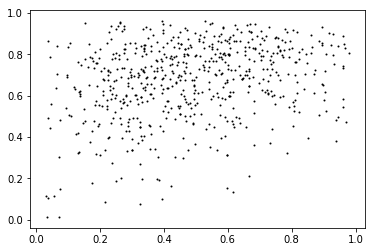

In [15]:
import matplotlib.pylab as plt
x=library['valence']
y=library['energy']
plt.scatter(x, y,c='black',s=1)